In [11]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [12]:
conn = sqlite3.connect("../data/checking-logs.sqlite")

# Получение данных
query = """
SELECT
    t.uid,
    AVG((julianday(datetime(d.deadlines, 'unixepoch')) - julianday(t.first_commit_ts)) * 24) AS avg_diff,
    COUNT(DISTINCT p.datetime) AS pageviews,
    COUNT(c.timestamp) AS num_commits
FROM datamart t
JOIN deadlines d ON t.labname = d.labs
LEFT JOIN pageviews p ON t.uid = p.uid
LEFT JOIN checker c ON t.uid = c.uid AND c.labname != 'project1'
WHERE t.labname != 'project1'
GROUP BY t.uid;
"""

df = pd.read_sql_query(query, conn)
conn.close()

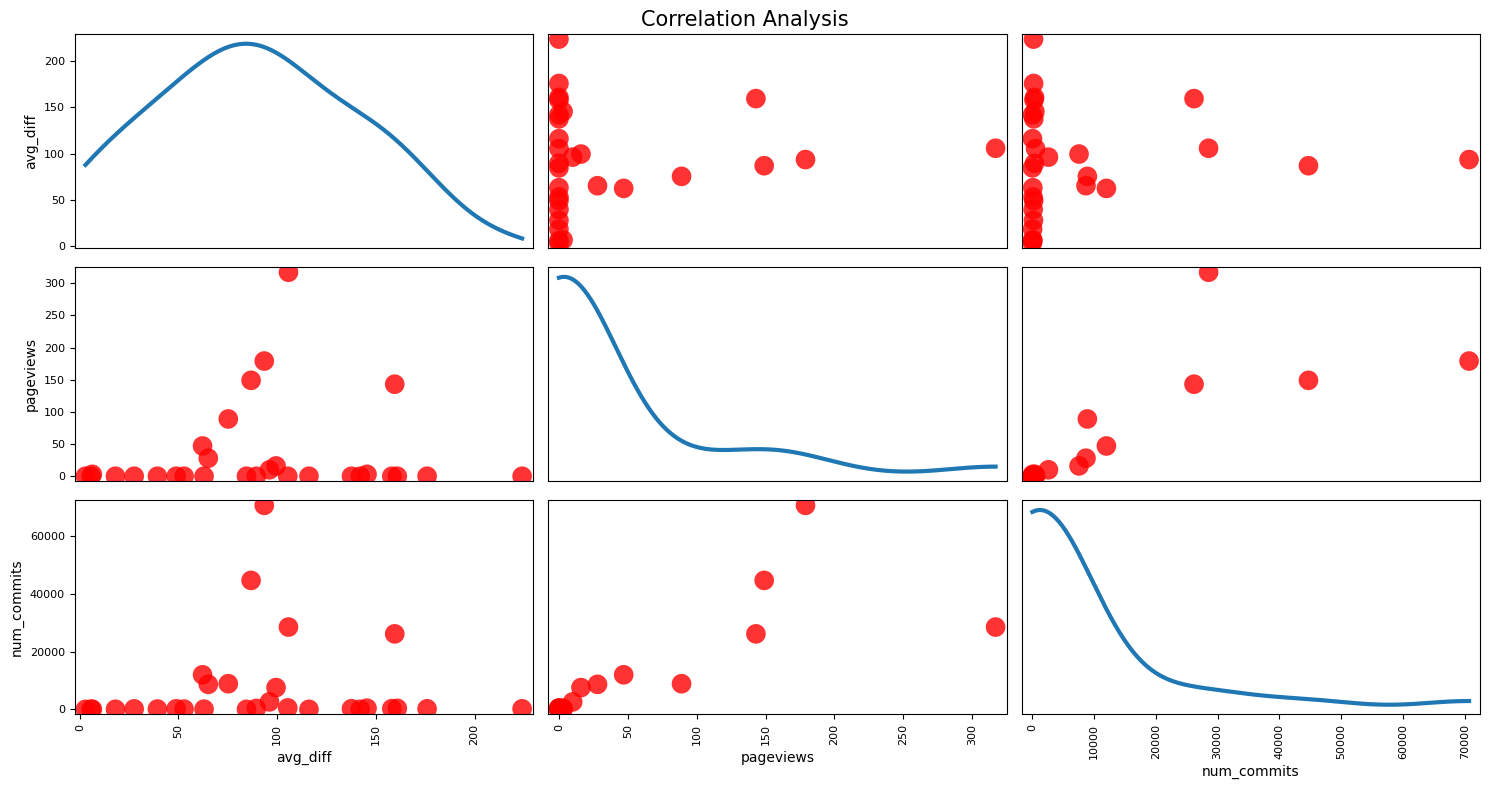

In [13]:
# Create scatter matrix
scatter_matrix(
    df[['avg_diff', 'pageviews', 'num_commits']],
    figsize=(15, 8),
    diagonal='kde',
    marker='o',
    s=200,  
    alpha=0.8,
    color='red',
    density_kwds={'linewidth': 3}  
)

plt.suptitle('Correlation Analysis', fontsize=15)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

### Вопросы:

1. **Можно ли сказать, что если у пользователя мало просмотров страниц, то у него, скорее всего, мало коммитов?** 
Ответ: да

2. **Можно ли сказать, что если у пользователя мало просмотров страниц, то у него, скорее всего, небольшая средняя разница между первым коммитом и крайним сроком лабораторной работы?** 
Ответ: нет

3. **Можно ли сказать, что есть много пользователей с малым количеством коммитов и несколько с большим количеством коммитов?** 
Ответ: да

4. **Можно ли сказать, что есть много пользователей с небольшой средней разницей и несколько с большой средней разницей?** 
Ответ: да